<a href="https://colab.research.google.com/github/hajerFrigui/Plant_Disease_Prediction/blob/master/PlantDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)Load Dataset

2)Visualize the images

3)Normalizition

4)CNN model

5)predict whether the plant is suffering from a disease

diseases are :(Corn_Common_rust or Potato_Early_blight or Tomato_Bacterial_spot)

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
#import liraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir 
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import adam_v2
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical

In [57]:
!ls "/content/drive/MyDrive/Colab Notebooks/plantDiseaseData"

'Corn_(maize)___Common_rust_'   Potato___Early_blight   Tomato___Bacterial_spot


Undrestand data

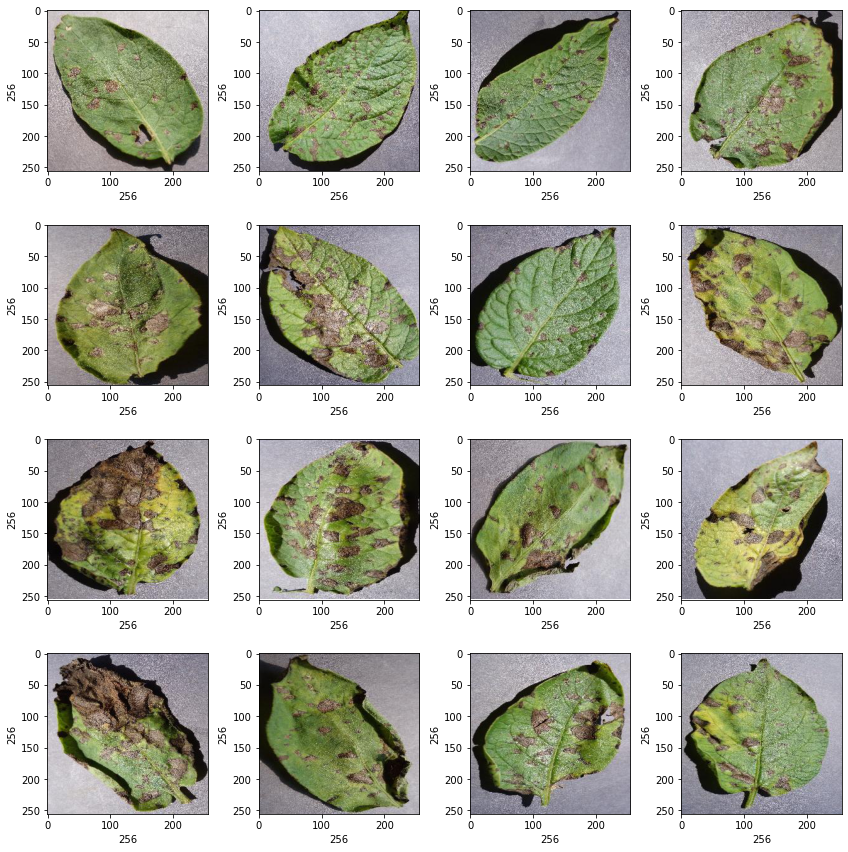

In [58]:
#using matplotlib library , we will plot 12 images 
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/Colab Notebooks/plantDiseaseData/Potato___Early_blight"
for i in range (1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)


In [59]:
#create a functio to convert the images into a nmpy array(required because we will normalize our dataset)
#use predefin function "img_to_array"
def convert_image_to_array(image_dir):
    try:
       image = cv2.imread(image_dir)
       if image is not None : 
          image = cv2.resize(image, (256,256))
          return img_to_array(image)
       else : 
          return np.array([])
    except Exception as e:
           print(f"Error : {e}")
           return None

In [60]:
dir ="/content/drive/MyDrive/Colab Notebooks/plantDiseaseData"
root_dir = listdir(dir)
image_list, label_list =[], []
all_labels = ['Corn_Common_rust', 'Potato_Early_blight', 'Tomato_Bacterial_spot']
binary_labels = [0,1,2]
temp = -1


for directory in root_dir:
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in plant_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])
        

In [80]:
image_list

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32), array([[[ 0.,  0.,  0.],
         [ 0., 

In [82]:
label_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [62]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    300
1    300
0    300
dtype: int64

In [61]:
image_list[0].shape

(256, 256, 3)

In [84]:
label_list = np.array(label_list)
label_list.shape



(900,)

Split Data

In [64]:
x_train, x_test,y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [65]:
x_train = np.array(x_train,dtype = np.float16) / 225.0
x_test = np.array(x_test,dtype=np.float16)/225.0
x_train = x_train.reshape(-1, 256,256,3)
x_test = x_test.reshape(-1, 256, 256,3)

In [66]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model

In [67]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding="same", input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 112896)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7225408   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

In [68]:

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
#spliting the trainig dataset inti training and validation dataset
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
epochs = 10
batch_size = 128
history = mlb.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

In [73]:
#save the model and convert it to json format
model.save("/content/drive/MyDrive/plant_diseace.h5")
json_model = model.to_json()
with open('/content/drive/MyDrive/plant_model.json','w') as json_file:
     json_file.write(json_model)
model.save_weights('/content/drive/MyDrive/plant_model_weights.h5')

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print (f"Test Accuracy:{scores[1]*100}")

In [76]:
y_pred = model.predict(x_test)

In [ ]:
img = array_to_img(x_test[10])
img

In [ ]:
print("Originally :",all_labels[np.argmax(y_test[10])])
print("predicted :", all_labels[np.argmax(y_pred[10])])